In [103]:
import pandas as pd
import numpy as np

In [104]:
#Read the CSV file ‘data.csv’
dat= pd.read_csv("/content/drive/MyDrive/data.csv")

In [105]:
dat.head

<bound method NDFrame.head of      Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]>

In [106]:
dat.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [107]:
dat.dtypes

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [108]:
dat.Calories.describe()


count     164.000000
mean      375.790244
std       266.379919
min        50.300000
25%       250.925000
50%       318.600000
75%       387.600000
max      1860.400000
Name: Calories, dtype: float64

In [109]:
# the basic statistical description about the data
dat.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [110]:
#Check if the data has null values.
dat.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [111]:
#Replace the null values with the mean
dat.fillna(dat.Calories.mean())

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [112]:
dat.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [113]:
dat.fillna(dat.mean(), inplace=True)

In [114]:
dat.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [115]:
dat.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [177]:
#Selecting two columns and aggregate the data using: min, max, count, mean.
dat.groupby('Duration').agg({'Calories': ['mean', 'min', 'max']})

Calories            
                 mean   min   max
Duration                         
15          87.000000    50   124
20         151.222222    50   229
25         244.000000   244   244
30         191.812500    86   319
45         278.885714   100   406
60         340.797468   215   486
75         325.000000   320   330
80         643.000000   643   643
90         541.625000   466   700
120        666.666667   500  1000
150        939.250000   816  1115
160        943.500000   853  1034
180        733.333333   600   800
210       1618.000000  1376  1860
270       1729.000000  1729  1729
300       1500.000000  1500  1500

In [117]:
#Filter the dataframe to select the rows with calories values between 500 and 1000.
r=dat[((dat['Calories']>=500) & (dat['Calories']<=1000))]
r
#print(r.value_counts())

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [118]:
#Filter the dataframe to select the rows with calories values > 500 and pulse <100
dat[((dat['Calories']>500) & (dat['Pulse']<100))]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


Using pandas.DataFrame.loc[] property you can select all columns you want and exclude one you don’t want. for example df.loc[:,df.columns] selects all columns and df.loc[:,df.columns != 'Duration'] ignores Duration column from the selection. Note that df.columns returns a pandas Series.

In [119]:
#Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”
df=dat.loc[:,dat.columns!='MAxpulse']

In [120]:
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [121]:
df2=dat.drop('Maxpulse', axis=1)
df2

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [122]:
dat

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [123]:
#Delete the “Maxpulse” column from the main df dataframe
dat.drop('Maxpulse',axis=1)

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [124]:
dat


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [125]:
#Delete the “Maxpulse” column from the main df dataframe permanently
del dat['Maxpulse']

In [126]:
dat

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [127]:
#Convert the datatype of Calories column to int datatype
dat.Calories.dtypes

dtype('float64')

In [128]:
dat.Calories=dat.Calories.astype(int)

In [178]:
print(dat.dtypes)

Duration    int64
Pulse       int64
Calories    int64
dtype: object


In [132]:
dat.isnull().sum()

Duration    0
Pulse       0
Calories    0
dtype: int64

<Axes: xlabel='Duration', ylabel='Calories'>

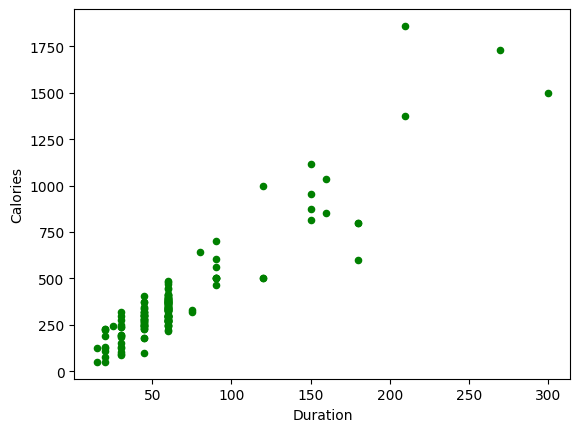

In [142]:
%matplotlib inline
#Using pandas create a scatter plot for the two columns (Duration and Calories).
#dat.Calories
x=list(dat.Duration)
y=list(dat.Calories)
dat.plot.scatter(x='Duration',y='Calories', c='green')

In [170]:
#importing sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [156]:
ds=pd.read_csv("/content/drive/MyDrive/glass.csv")

In [146]:
ds.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [147]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [157]:
ds.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [149]:
ds.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [162]:
ds.shape

(214, 10)

In [163]:
x=ds.iloc[:, :-1].values
y=ds.iloc[ :, -1].values

In [164]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2,random_state=0)

In [166]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [172]:
classifier=SVC()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy is:", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is: 0.20930232558139536


In [173]:
#naviebase classifier
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy is:", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is: 0.37209302325581395


In [174]:
#BernoulliNB classifier
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy is:", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.27      0.89      0.41         9
           2       0.29      0.11      0.15        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.35        43
   macro avg       0.23      0.30      0.23        43
weighted avg       0.30      0.35      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 1  0  0  0  0  5]]
accuracy is: 0.3488372093023256


In [175]:
#ComplementNB classifier
from sklearn.naive_bayes import ComplementNB
classifier=ComplementNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy is:", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.28      1.00      0.44         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.40        43
   macro avg       0.42      0.50      0.41        43
weighted avg       0.23      0.40      0.27        43

[[ 9  0  0  0  0  0]
 [17  0  0  0  1  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  0  6]]
accuracy is: 0.3953488372093023


In [176]:
#MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("accuracy is:", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.28      0.89      0.42         9
           2       0.40      0.11      0.17        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.67      1.00      0.80         6

    accuracy                           0.37        43
   macro avg       0.22      0.33      0.23        43
weighted avg       0.33      0.37      0.27        43

[[ 8  1  0  0  0  0]
 [16  2  0  0  0  1]
 [ 5  0  0  0  0  0]
 [ 0  0  0  0  0  2]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
accuracy is: 0.37209302325581395
